# Euler Circuits

Euler circuits are a special type of circuit where every edge in the graph is used exactly once. Graphs that have euler circuits must have the following properties:

1. The graph must be connected.
1. If the graph is *undirected* then every vertex must have an even-degree.
1. If the graph is *directed* then the in-degree must be the same as the out-degree for every vertex.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from helper import draw_graph, clear_marks, animate_euler

## How the algorithm works

pseudocode:
```
function euler_circuit(G):
    init an empty list to store our path --> paths_list
    choose a random start node
    choose a random unvisited path till we reach our start node.
    add the path to our list (it will look [a, b, ..., x, ...,a])
    for any node, x, in the path that has unvisted edges connected to it:
        choose a random unvisited path till we reach x again ([x, c, ..., g, x])
        add this path in where x was in the original path ([a, b, ..., x, c, ..., g, x, ..., a])
        repeat until every edge is marked.
```

The algorithm tries finds cycles in the graph and creates a path from it. Then it just keeps finding new cycles and adds these paths in with the original cycle and builds up the euler-circuit.

For example: If we find a cycle in he graph starting and ending at node a then that first cycle becomes our path (a, ..., x, ..., a). We then find another __unvisited__ cycle starting and ending at x (x, ..., b, ..., x). We just replace x in our original path with with our new path to get (a, ..., x, ..., b, ..., x, ..., a)

In [2]:
def find_cycle(G, start_node):
    cycle = [start_node]
    prev = start_node
    while True:
        rand_neighbor = random.choice([n for n in G.adj[prev] if not G.adj[prev][n].get('marked')])
        if not G.edges[(prev, rand_neighbor)].get('marked'):
            G.edges[prev, rand_neighbor]['marked'] = True
            cycle.append(rand_neighbor)
            prev = rand_neighbor
        if prev == start_node:
            break
    return cycle

def euler_circuit(G):
    G = G.copy()
    start = random.choice(list(G.nodes))
    circuit = find_cycle(G, start)
    start_search = 0
    while True:
        for i, node in enumerate(circuit[start_search:]):
            if len(list(n for n in G.adj[node] if not G.adj[node][n].get('marked'))) > 0:
                cycle = find_cycle(G, node)
                start_search += i
                circuit = circuit[:start_search] + cycle + circuit[start_search+1:]
                break
        else:
              return circuit

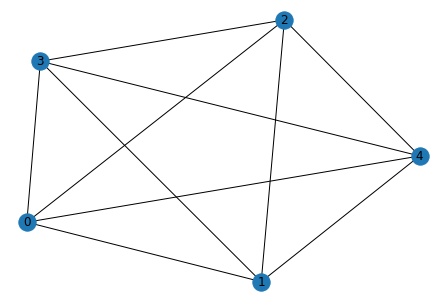

In [3]:
# In an undirected complete graph with N vertices.
# the degree of each vertex is N - 1.
G = nx.complete_graph(5)
nx.draw(G, with_labels=1)

In [4]:
circuit = euler_circuit(G)
print(circuit)
animate_euler(G, circuit)

[0, 1, 4, 2, 0, 4, 3, 1, 2, 3, 0]


<Figure size 432x288 with 0 Axes>